In [114]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import geoviews as gv
import geoviews.tile_sources as gvts
import hvplot.pandas
import plotly.express as px

In [115]:
states = ['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey', 'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina', 'south-dakota', 'tennessee', 'texas', 'vermont', 'virginia', 'washington', 'west-virginia', 'wisconsin', 'wyoming']

In [116]:
states = ['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'montana', 'nebraska', 'nevada', 'new-hampshire', 'new-jersey', 'new-mexico', 'new-york', 'north-carolina', 'north-dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode-island', 'south-carolina', 'south-dakota', 'tennessee', 'texas', 'vermont', 'virginia', 'west-virginia', 'wisconsin', 'wyoming']

In [117]:
state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

In [118]:
state_dfs = {}

In [119]:
for state in states:
    state_df = pd.read_csv(Path(f"{state}.csv"))
    state_dfs[state] = state_df[["name", "brewery_type", "city", "state", "postal_code", "longitude", "latitude"]]

In [120]:

all_states_df = pd.concat(state_dfs.values()).reset_index(drop= True).dropna()

In [121]:
all_states_df

,name,brewery_type,city,state,postal_code,longitude,latitude
0,5 Rivers Brewing LLC,planning,Spanish Fort,Alabama,36527-3161,-87.915272,30.674913
1,Avondale Brewing Co,micro,Birmingham,Alabama,35222-1932,-86.774322,33.524521
2,Back Forty Beer Co,micro,Gadsden,Alabama,35901-3361,-86.005006,34.016888
3,Band of Brothers Brewing Company,micro,Tuscaloosa,Alabama,35401-4653,-87.562155,33.198491
4,Below the Radar Brewing Co,brewpub,Huntsville,Alabama,35801-4837,-86.585839,34.732724
...,...,...,...,...,...,...,...
7245,Pat O'Hara Brewing Company,brewpub,Cody,Wyoming,82414-3721,-109.058375,44.526783
7246,Roadhouse Brewing Company,micro,Jackson,Wyoming,83001-9433,-110.796320,43.463460
7251,Square State Brewing,micro,Rock Springs,Wyoming,82901,-109.220640,41.586247
7253,Suds Brothers Brewing Co,brewpub,Evanston,Wyoming,82930-3443,-110.966094,41.267987


In [122]:
grouped_data = all_states_df.groupby(['state', 'brewery_type']).count().reset_index()


In [123]:
state_locations = {'Alabama': {'lat': 32.806671, 'lon': -86.79113},
                   'Alaska': {'lat': 61.370716, 'lon': -152.404419},
                   'Arizona': {'lat': 33.729759, 'lon': -111.431221},
                   'Arkansas': {'lat': 34.969704, 'lon': -92.373123},
                   'California': {'lat': 36.116203, 'lon': -119.681564},
                   'Colorado': {'lat': 39.059811, 'lon': -105.311104},
                   'Connecticut': {'lat': 41.597782, 'lon': -72.755371},
                   'Delaware': {'lat': 39.318523, 'lon': -75.507141},
                   'District of Columbia': {'lat': 38.897438, 'lon': -77.026817},
                   'Florida': {'lat': 27.766279, 'lon': -81.686783},
                   'Georgia': {'lat': 33.040619, 'lon': -83.643074},
                   'Hawaii': {'lat': 21.094318, 'lon': -157.498337},
                   'Idaho': {'lat': 44.240459, 'lon': -114.478828},
                   'Illinois': {'lat': 40.349457, 'lon': -88.986137},
                   'Indiana': {'lat': 39.849426, 'lon': -86.258278},
                   'Iowa': {'lat': 42.011539, 'lon': -93.210526},
                   'Kansas': {'lat': 38.5266, 'lon': -96.726486},
                   'Kentucky': {'lat': 37.66814, 'lon': -84.670067},
                   'Louisiana': {'lat': 31.169546, 'lon': -91.867805},
                   'Maine': {'lat': 44.693947, 'lon': -69.381927},
                   'Maryland': {'lat': 39.063946, 'lon': -76.802101},
                   'Massachusetts': {'lat': 42.230171, 'lon': -71.530106},
                   'Michigan': {'lat': 43.326618, 'lon': -84.536095},
                   'Minnesota': {'lat': 45.694454, 'lon': -93.900192},
                   'Mississippi': {'lat': 32.741646, 'lon': -89.678696},
                   'Missouri': {'lat': 38.456085, 'lon': -92.288368},
                   'Montana': {'lat': 46.921925, 'lon': -110.454353},
                   'Nebraska': {'lat': 41.12537, 'lon': -98.268082},
                   'Nevada': {'lat': 38.313515, 'lon': -117.055374},
                   'New Hampshire': {'lat': 43.452492, 'lon': -71.563896},
                   'New Jersey': {'lat': 40.298904, 'lon': -74.521011},
                   'New Mexico': {'lat': 34.840515, 'lon': -106.248482},
                   'New York': {'lat': 42.165726, 'lon': -74.948051},
                   'North Carolina': {'lat': 35.630066, 'lon': -79.806419},
                   'North Dakota': {'lat': 47.528912, 'lon': -99.784012},
                   'Ohio': {'lat': 40.388783, 'lon': -82.764915},
                   'Oklahoma': {'lat': 35.565342, 'lon': -96.928917},
                   'Oregon': {'lat': 44.572021, 'lon': -122.070938},
                   'Pennsylvania': {'lat': 40.590752, 'lon': -77.209755},
                   'Rhode Island': {'lat': 41.680893, 'lon': -71.51178},
                   'South Carolina': {'lat': 33.856892, 'lon': -80.945007},
                   'South Dakota': {'lat': 44.299782, 'lon': -99.438828},
                   'Tennessee': {'lat': 35.747845, 'lon': -86.692345},
                   'Texas': {'lat': 31.054487, 'lon': -97.563461},
                   'Utah': {'lat': 40.150032, 'lon': -111.862434},
                   'Vermont': {'lat': 44.045876, 'lon': -72.710686},
                   'Virginia': {'lat': 37.769337, 'lon': -78.169968},
                   'Washington': {'lat': 47.400902, 'lon': -121.490494},
                   'West Virginia': {'lat': 38.491226, 'lon': -80.954453},
                   'Wisconsin': {'lat': 44.268543, 'lon': -89.616508},
                   'Wyoming': {'lat': 42.755966, 'lon': -107.30249}}

In [124]:
colors = {'brewpub': 'blue', 'contract': 'green', 'micro': 'orange', 'regional': 'red'}


In [130]:
grouped_data['latitude'] = grouped_data['state'].apply(lambda x: state_locations[x]['lat'])
grouped_data['longitude'] = grouped_data['state'].apply(lambda x: state_locations[x]['lon'])

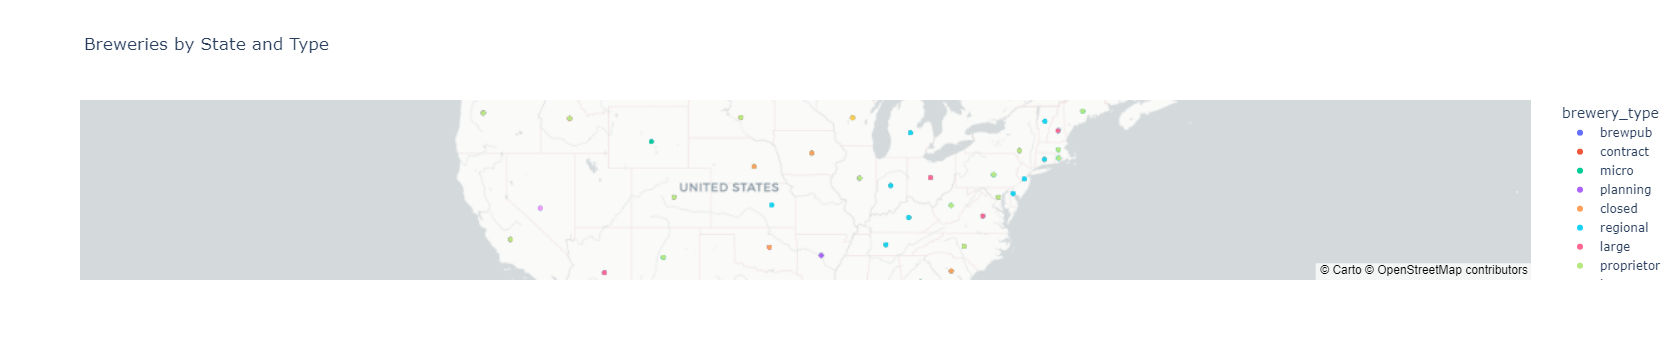

In [133]:

fig = px.scatter_mapbox(grouped_data, lat='latitude', lon='longitude', hover_name='name',
                        hover_data={'state': True, 'brewery_type': True},
                        color='brewery_type', zoom=3, mapbox_style='carto-positron',
                        title='Breweries by State and Type')
fig.show()

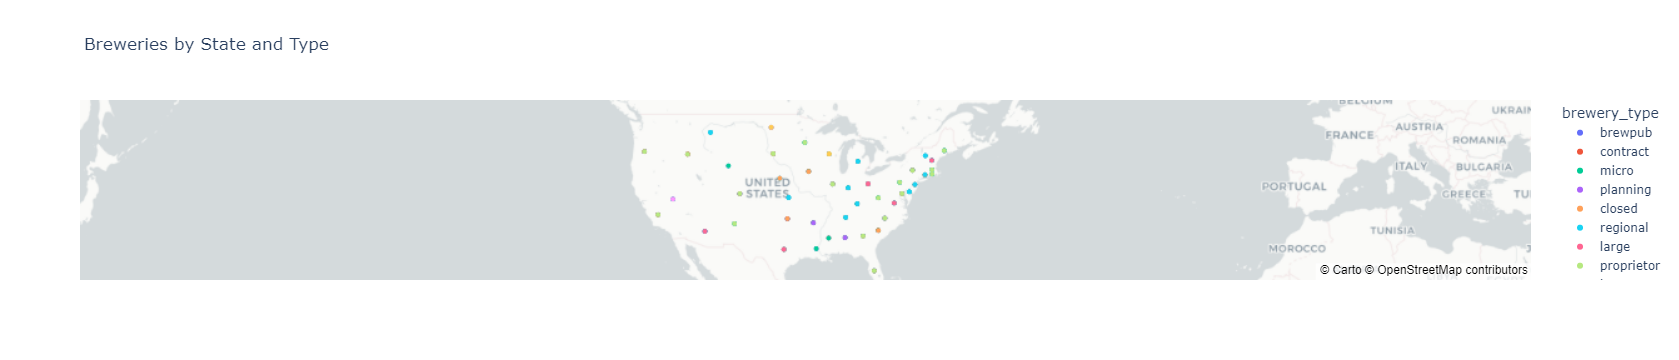

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [138]:
fig = px.scatter_mapbox(grouped_data, lat='latitude', lon='longitude', hover_name='state',
                        hover_data={'state': True, 'brewery_type': True, 'name': True},
                        color='brewery_type', zoom=2, mapbox_style='carto-positron',
                        title='Breweries by State and Type')
fig.show()
fig.write_image("breweries_map.png")

In [49]:
all_states_df["postal_code"] = all_states_df["postal_code"].str[:5]

In [50]:
all_states_df

,name,brewery_type,city,state,postal_code,longitude,latitude
0,5 Rivers Brewing LLC,planning,Spanish Fort,Alabama,36527,-87.915272,30.674913
1,Avondale Brewing Co,micro,Birmingham,Alabama,35222,-86.774322,33.524521
2,Back Forty Beer Co,micro,Gadsden,Alabama,35901,-86.005006,34.016888
3,Band of Brothers Brewing Company,micro,Tuscaloosa,Alabama,35401,-87.562155,33.198491
4,Below the Radar Brewing Co,brewpub,Huntsville,Alabama,35801,-86.585839,34.732724
...,...,...,...,...,...,...,...
7912,Suds Brothers Brewing Co,brewpub,Evanston,Wyoming,82930,-110.966094,41.267987
7913,Ten Sleep Brewing Company,micro,Ten Sleep,Wyoming,82442,NaN,NaN
7914,Wind River Brewing Co - WY,brewpub,Pinedale,Wyoming,82941,NaN,NaN
7915,WYOld West Brewing Company,brewpub,Powell,Wyoming,82435,-108.757481,44.754520


In [51]:
df = all_states_df[["state", "brewery_type"]]


<Axes: title={'center': 'Brewery Types by State'}, xlabel='state'>

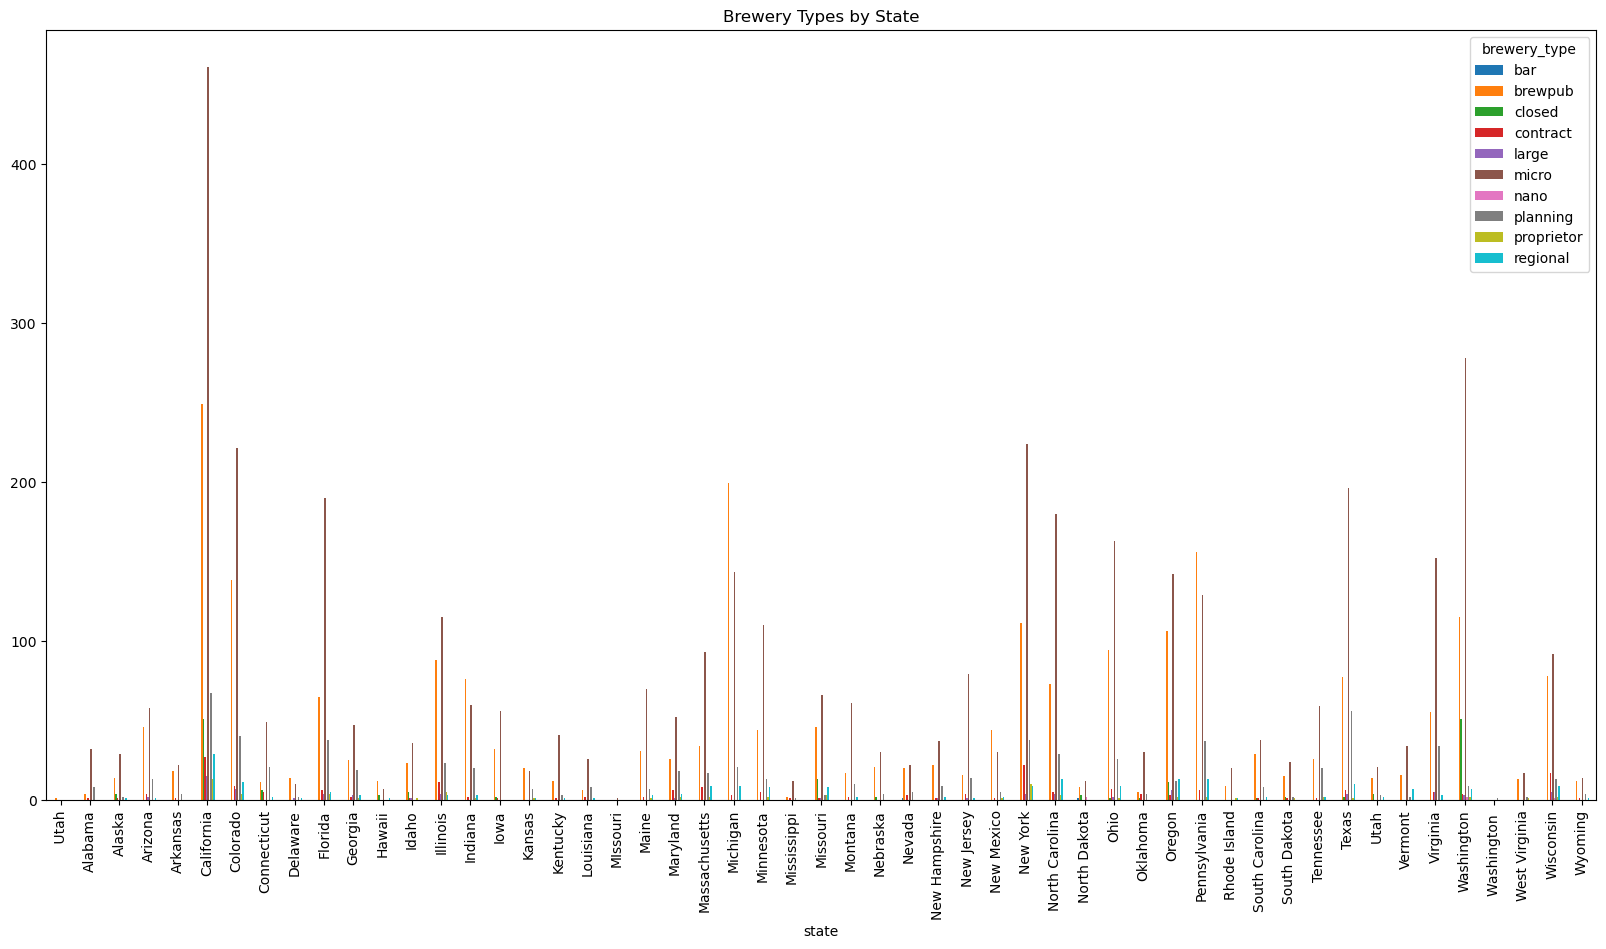

In [141]:
df.groupby("brewery_type").state.value_counts().unstack(0).plot.bar(figsize = (20,10), title = "Brewery Types by State" )